# <h1><center>Fraud Detection Case study</center></h1>

Given Dataset: Dataset contain actual transaction with anonymized features and a time and a class feature (0 = non fraud, 1 = fraud)
Objective: built a robust model that can predict whether a transaction is fraudulent or not.
I built a deep learning model using Keras and Tensorflow to achieve the task.

Process:
- Imported and cleaned the data by standardizing the data using Sklearn StandardScalar.
- Built a deep learning model using TensorFlow and Keras with a 99% accuracy, yet with misclassified observations which we need to get rid of.
- Tested multiple other algorithms such as SVM, Random Forest to find ones with best predictive power.
- Optimized model by undersampling and oversampling unbalanced data which gave a model with 99% accuracy and no misclassified fraudulent transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2)

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
list(dataset)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [5]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.shape

(284807, 31)

In [7]:
from sklearn.preprocessing import StandardScaler
dataset['normaliedAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'], axis=1)

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normaliedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
dataset = dataset.drop(['Time'], axis=1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normaliedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
X = dataset.iloc[:, dataset.columns !='Class']
y = dataset.iloc[:, dataset.columns == 'Class']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [12]:
X_train.shape

(199364, 29)

In [13]:
X_test.shape

(85443, 29)

In [15]:
#Convert train and test into arrays for deep learning model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
#model building

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [18]:
model = Sequential([
    Dense(units = 16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24, activation= 'relu'),
    Dense(1,activation='sigmoid'),
    
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 14s 69us/step - loss: 0.0119 - acc: 0.9976
Epoch 2/5
199364/199364 [==============================] - 13s 67us/step - loss: 0.0043 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 15s 77us/step - loss: 0.0039 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 14s 68us/step - loss: 0.0038 - acc: 0.9993
Epoch 5/5
199364/199364 [==============================] - 13s 66us/step - loss: 0.0038 - acc: 0.9994


In [21]:
#evaulate the model
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 9us/step


In [22]:
print(score)

[0.003351401555200906, 0.9995201479348805]


In [23]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [24]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())


In [25]:
print(cm)

[[85290    19]
 [   22   112]]


Confusion matrix, without normalization
[[85290    19]
 [   22   112]]


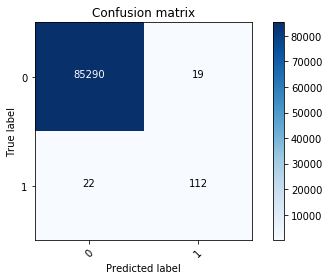

In [26]:
plot_confusion_matrix(cm,classes=[0,1])
plt.show()

In [27]:
## build random forest classifier 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)

In [30]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_pred = random_forest.predict(X_test)

In [32]:
random_forest.score(X_test, y_test)

0.9994850368081645

In [33]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [34]:
cm = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85274     6]
 [   38   125]]


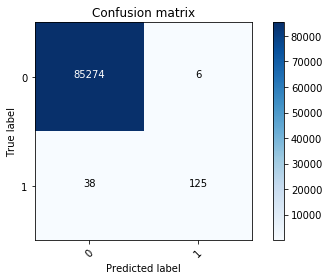

In [35]:
plot_confusion_matrix(cm, classes=[0,1])

In [36]:
y_pred = random_forest.predict(X)

In [37]:
cm = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[284309      6]
 [    38    454]]


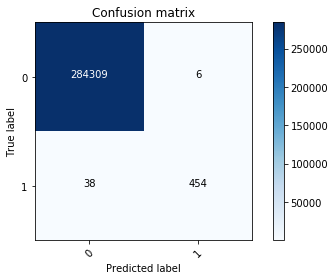

In [38]:
plot_confusion_matrix(cm, classes=[0,1])

In [39]:
##optimize model
##undersampling

fraud_indices = np.array(dataset[dataset.Class == 1].index) #built an array of the fraud rows class
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [40]:
normal_indices = dataset[dataset.Class == 0].index ## built an array of data of the non frauld rows class 

In [41]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

In [42]:
print(len(random_normal_indices))

492


In [43]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [44]:
under_sample_data = dataset.iloc[under_sample_indices,:]

In [45]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
688/688 [==============================] - 0s 616us/step - loss: 0.5209 - acc: 0.9215
Epoch 2/5
688/688 [==============================] - 0s 95us/step - loss: 0.2916 - acc: 0.9331
Epoch 3/5
688/688 [==============================] - 0s 82us/step - loss: 0.1900 - acc: 0.9390
Epoch 4/5
688/688 [==============================] - 0s 86us/step - loss: 0.1910 - acc: 0.9404
Epoch 5/5
688/688 [==============================] - 0s 84us/step - loss: 0.1657 - acc: 0.9462


Confusion matrix, without normalization
[[148   0]
 [ 16 132]]


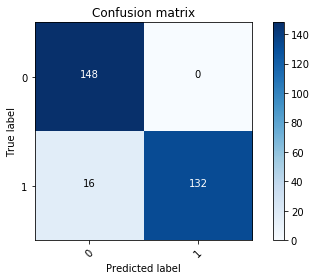

In [50]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283773    542]
 [    52    440]]


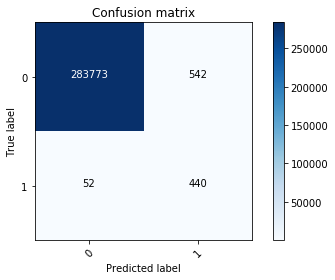

In [51]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

In [52]:
##oversampling (SMOTE)
from imblearn.over_sampling import SMOTE

In [53]:
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [54]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size = 0.3)

In [56]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 27s 68us/step - loss: 0.0348 - acc: 0.9880
Epoch 2/5
398041/398041 [==============================] - 26s 66us/step - loss: 0.0143 - acc: 0.9961
Epoch 3/5
398041/398041 [==============================] - 27s 67us/step - loss: 0.0116 - acc: 0.9971
Epoch 4/5
398041/398041 [==============================] - 27s 67us/step - loss: 0.0103 - acc: 0.9975
Epoch 5/5
398041/398041 [==============================] - 27s 67us/step - loss: 0.0093 - acc: 0.9978


Confusion matrix, without normalization
[[85072   279]
 [    0 85238]]


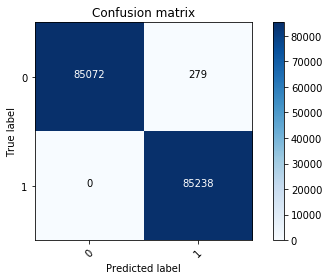

In [58]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

In [59]:
random_forest.score(X_test, y_test)

0.9085755822473899

Confusion matrix, without normalization
[[283492    823]
 [     0    492]]


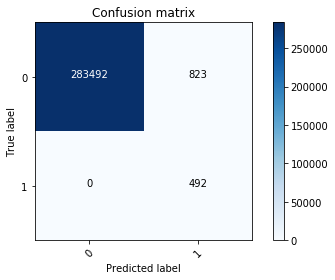

In [60]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

In [61]:
random_forest.score(X, y)

0.9998455094151478